# Step 1 - Data Analysis

## Step 1.1 - Importing the Libraries

In [58]:
from pandas import read_csv
from pandas import datetime
from pandas import concat
from pandas import DataFrame
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from math import sqrt
from keras import regularizers
import pandas as pd
from keras.utils.vis_utils import plot_model
from pandas.tools.plotting import lag_plot
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
import numpy as np
import pydot
import graphviz

## Step 1.2 - Load the Dataset

In [59]:
def parser(x):
    return datetime.strptime(x,'%Y/%m/%d')
dataset = read_csv('data/USD-IDR-011016-311218.csv',header=0,parse_dates=[1],date_parser=parser)
#series = Series.from_csv('data/USD-IDR-011016-311218.csv',header=0)
#autocorrelation_plot(series)
#pyplot.show()

In [60]:
print(dataset.head())

   Jul.Day YYYY/MM/DD  Wdy  IDR/USD
0  2457392 2016-01-04  Mon    13969
1  2457393 2016-01-05  Tue    13854
2  2457394 2016-01-06  Wed    13945
3  2457395 2016-01-07  Thu    13922
4  2457396 2016-01-08  Fri    13874


In [61]:
dataset.describe()

,Jul.Day,IDR/USD
count,7.490000e+02,749.000000
mean,2.457936e+06,13637.456609
std,3.160145e+02,546.606783
min,2.457392e+06,12946.000000
25%,2.457661e+06,13282.000000
50%,2.457934e+06,13414.000000
75%,2.458211e+06,13836.000000
max,2.458484e+06,15286.000000


In [62]:
dataset.shape

(749, 4)

## Step 1.3 -  Plot a graph to show the trend in the exchange rates

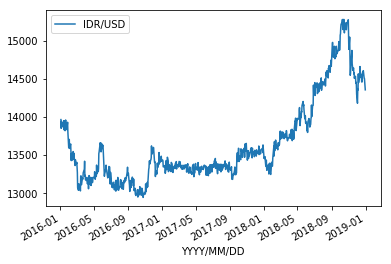

In [63]:
dataset.plot(y='IDR/USD',x='YYYY/MM/DD')
pyplot.show()

In [64]:
# load dataset
dataset = read_csv('data/USD-IDR-011016-311218.csv', usecols = [3])
values = dataset.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [65]:
train = int(len(scaled) * 0.80)
test = len(scaled) - train

In [66]:
print(train , test)

599 150


In [67]:
train = scaled[0:train]
print(train)

[[0.43717957]
 [0.38803387]
 [0.4269228 ]
 [0.41709375]
 [0.39658117]
 [0.41880322]
 [0.39700842]
 [0.39829063]
 [0.43076897]
 [0.38034153]
 [0.42863226]
 [0.37478638]
 [0.405128  ]
 [0.43504238]
 [0.39658117]
 [0.38076925]
 [0.41752148]
 [0.40940142]
 [0.42222214]
 [0.36666632]
 [0.27863216]
 [0.2927351 ]
 [0.3260684 ]
 [0.27521372]
 [0.2811966 ]
 [0.2999997 ]
 [0.25769234]
 [0.2072649 ]
 [0.24700832]
 [0.20769215]
 [0.21794844]
 [0.25769234]
 [0.21623898]
 [0.24957275]
 [0.20128202]
 [0.18974352]
 [0.1790595 ]
 [0.21153831]
 [0.19957256]
 [0.18931627]
 [0.19700861]
 [0.16623926]
 [0.14017057]
 [0.0551281 ]
 [0.04017067]
 [0.07692289]
 [0.06794882]
 [0.07051277]
 [0.05897427]
 [0.03675222]
 [0.12008524]
 [0.12136745]
 [0.07222223]
 [0.07136726]
 [0.10897446]
 [0.10128212]
 [0.10982895]
 [0.13803387]
 [0.15854692]
 [0.20341873]
 [0.12008524]
 [0.12393141]
 [0.09957266]
 [0.09487152]
 [0.09572649]
 [0.1123929 ]
 [0.09273481]
 [0.07692289]
 [0.09871769]
 [0.04871798]
 [0.10341883]
 [0.12

In [68]:
test = scaled[len(train) : ]

In [69]:
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)

In [70]:
print(train.shape , test.shape)

(599, 1) (150, 1)


In [71]:
def process_data(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [72]:
n_features = 2

trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(596, 2) (596,) (147, 2) (147,)


In [73]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [74]:
model = Sequential()
model.add(LSTM(500, input_shape=(trainX.shape[1], trainX.shape[2]),kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1))
plot_model(model, to_file='model.png',show_shapes=True)
model.compile(loss='mae', optimizer='adam',metrics=['mse'])

Train on 596 samples, validate on 147 samples
Epoch 1/100
 - 1s - loss: 1.1811 - mean_squared_error: 0.0389 - val_loss: 1.5215 - val_mean_squared_error: 0.4284
Epoch 2/100
 - 0s - loss: 0.9296 - mean_squared_error: 0.0242 - val_loss: 1.2706 - val_mean_squared_error: 0.3603
Epoch 3/100
 - 0s - loss: 0.7061 - mean_squared_error: 0.0140 - val_loss: 1.0492 - val_mean_squared_error: 0.3028
Epoch 4/100
 - 0s - loss: 0.5305 - mean_squared_error: 0.0098 - val_loss: 0.8707 - val_mean_squared_error: 0.2689
Epoch 5/100
 - 0s - loss: 0.4022 - mean_squared_error: 0.0100 - val_loss: 0.7463 - val_mean_squared_error: 0.2645
Epoch 6/100
 - 0s - loss: 0.2974 - mean_squared_error: 0.0108 - val_loss: 0.6681 - val_mean_squared_error: 0.2798
Epoch 7/100
 - 0s - loss: 0.2127 - mean_squared_error: 0.0112 - val_loss: 0.6184 - val_mean_squared_error: 0.3000
Epoch 8/100
 - 0s - loss: 0.1540 - mean_squared_error: 0.0115 - val_loss: 0.5855 - val_mean_squared_error: 0.3107
Epoch 9/100
 - 0s - loss: 0.1197 - mean_sq

Epoch 72/100
 - 0s - loss: 0.0826 - mean_squared_error: 0.0112 - val_loss: 0.5305 - val_mean_squared_error: 0.3021
Epoch 73/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5307 - val_mean_squared_error: 0.3022
Epoch 74/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5307 - val_mean_squared_error: 0.3022
Epoch 75/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5307 - val_mean_squared_error: 0.3023
Epoch 76/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5305 - val_mean_squared_error: 0.3021
Epoch 77/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5305 - val_mean_squared_error: 0.3021
Epoch 78/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5306 - val_mean_squared_error: 0.3022
Epoch 79/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.5306 - val_mean_squared_error: 0.3022
Epoch 80/100
 - 0s - loss: 0.0827 - mean_squared_error: 0.0112 - val_loss: 0.530

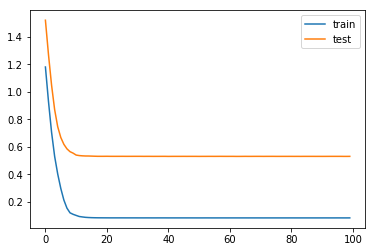

In [75]:
history = model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.plot(history.history['mean_squared_error'],label='mse')
pyplot.legend()
pyplot.show()

In [76]:
yhat = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, testX[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = concatenate((testY, testX[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1286.253


In [78]:
inv_yhat = inv_yhat.reshape((147,1))
inv_y = inv_y.reshape((147,1))

In [79]:
inv_yhat = pd.DataFrame(inv_yhat)
inv_y = pd.DataFrame(inv_y)

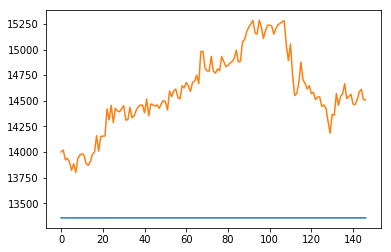

In [81]:
pyplot.plot(inv_yhat,label='predicted')
pyplot.plot(inv_y,label='actual')
#plot1, = plt.plot(a,b)

No handles with labels found to put in legend.


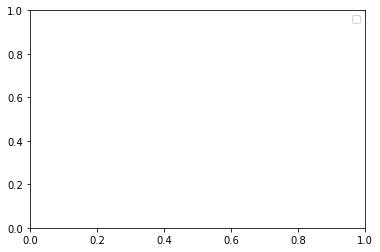

In [82]:
pyplot.legend()
pyplot.show()

In [83]:
errr = inv_y-inv_yhat

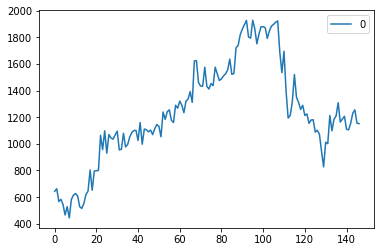

In [84]:
errr.plot()
pyplot.show()

In [85]:
errr.describe()

,0
count,147.000000
mean,1230.764526
std,374.996033
min,443.383789
25%,1052.113281
50%,1185.064453
75%,1482.392090
max,1928.766602


In [86]:
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 500)               1006000   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 1,006,501
Trainable params: 1,006,501
Non-trainable params: 0
_________________________________________________________________
